In [ ]:
!pip install matplotlib

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving MSN.csv to MSN.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [64]:
df = pd.read_csv('MSN.csv')
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,89000
1,89500
2,89400
3,90000
4,90000
...,...
1263,77400
1264,77300
1265,78000
1266,78500


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1268 non-null   int64
dtypes: int64(1)
memory usage: 10.0 KB


<h1> Split the data into training, testing, and validation sets (7:2:1)

In [66]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [67]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [68]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [70]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [71]:
#  Create index for next 30 days
last_index = df.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']
next_30_days_features = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30 days
next_30_days_predictions = model.predict(next_30_days_features.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_df = pd.DataFrame(next_30_days_predictions, index=next_30_days_index, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1267         113001.0
1268         113001.0
1269         113001.0
1270         113001.0
1271         113001.0
1272         113001.0
1273         113001.0
1274         113001.0
1275         113001.0
1276         113001.0
1277         113001.0
1278         113001.0
1279         113001.0
1280         113001.0
1281         113001.0
1282         113001.0
1283         113001.0
1284         113001.0
1285         113001.0
1286         113001.0
1287         113001.0
1288         113001.0
1289         113001.0
1290         113001.0
1291         113001.0
1292         113001.0
1293         113001.0
1294         113001.0
1295         113001.0
1296         113001.0


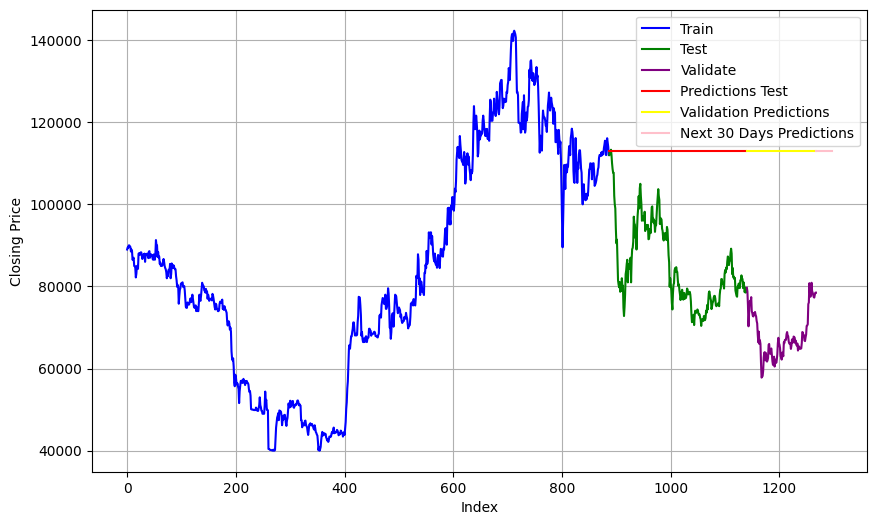

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_df.index, predicted_df['Predicted Close'], color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 45279.45030309003
Testing RMSE: 29728.819666891606
Validation MAE: 44935.375
Testing MAE: 28042.098814229248
Validation MAPE: 67.08887529706948
Testing MAPE: 34.69863559120788


<h1> # Split the data into training, testing, and validation sets (6:3:1)


In [ ]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [ ]:
#  Create index for next 30 days
last_index = df.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']
next_30_days_features = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30 days
next_30_days_predictions = model.predict(next_30_days_features.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_df = pd.DataFrame(next_30_days_predictions, index=next_30_days_index, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1267        115590.01
1268        115590.01
1269        115590.01
1270        115590.01
1271        115590.01
1272        115590.01
1273        115590.01
1274        115590.01
1275        115590.01
1276        115590.01
1277        115590.01
1278        115590.01
1279        115590.01
1280        115590.01
1281        115590.01
1282        115590.01
1283        115590.01
1284        115590.01
1285        115590.01
1286        115590.01
1287        115590.01
1288        115590.01
1289        115590.01
1290        115590.01
1291        115590.01
1292        115590.01
1293        115590.01
1294        115590.01
1295        115590.01
1296        115590.01


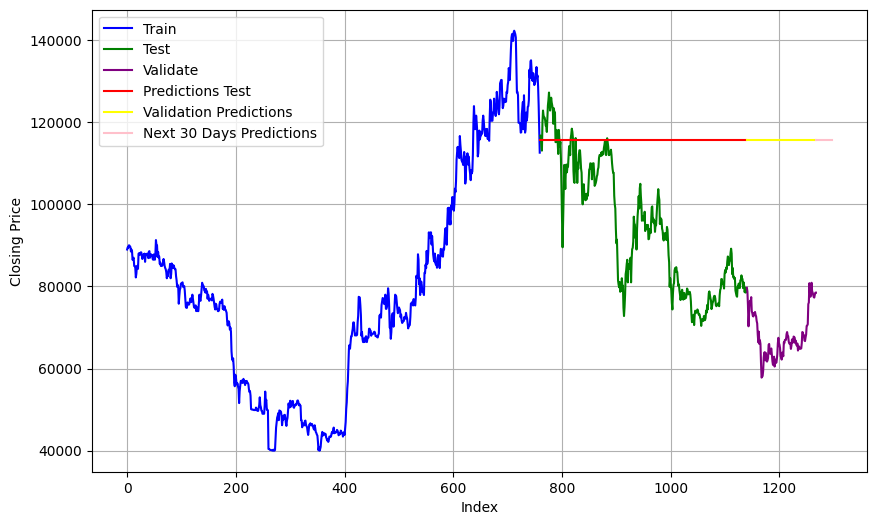

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_df.index, predicted_df['Predicted Close'], color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 47849.84705291752
Testing RMSE: 26650.519784997083
Validation MAE: 47524.385
Testing MAE: 22516.239631578945
Validation MAPE: 70.91711371117965
Testing MAPE: 27.11569681632063


<h1> # Split the data into training, testing, and validation sets (5:3:2)


In [ ]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [ ]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [ ]:
#  Create index for next 30 days
last_index = df.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']
next_30_days_features = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30 days
next_30_days_predictions = model.predict(next_30_days_features.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_df = pd.DataFrame(next_30_days_predictions, index=next_30_days_index, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1267        107602.88
1268        107602.88
1269        107602.88
1270        107602.88
1271        107602.88
1272        107602.88
1273        107602.88
1274        107602.88
1275        107602.88
1276        107602.88
1277        107602.88
1278        107602.88
1279        107602.88
1280        107602.88
1281        107602.88
1282        107602.88
1283        107602.88
1284        107602.88
1285        107602.88
1286        107602.88
1287        107602.88
1288        107602.88
1289        107602.88
1290        107602.88
1291        107602.88
1292        107602.88
1293        107602.88
1294        107602.88
1295        107602.88
1296        107602.88


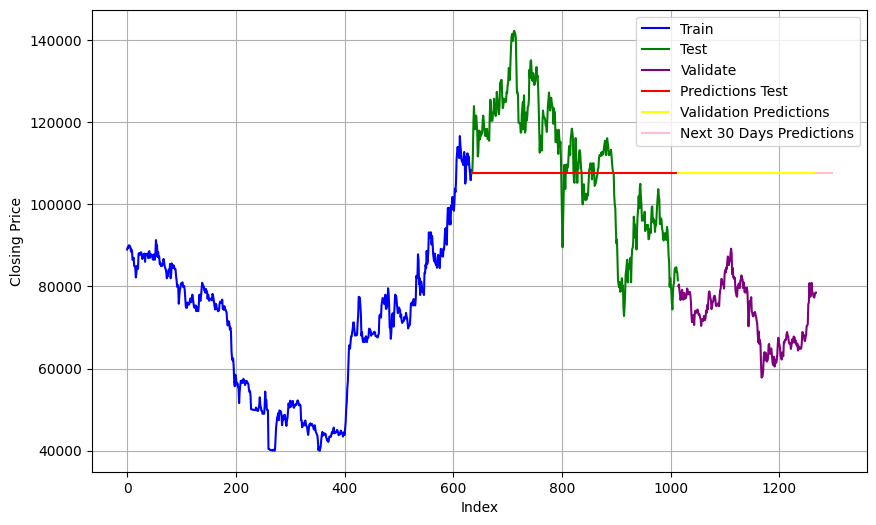

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_df.index, predicted_df['Predicted Close'], color='pink', label='Next 30 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 35275.58221904814
Testing RMSE: 15785.106186221705
Validation MAE: 34567.84062992126
Testing MAE: 13314.807473684208
Validation MAPE: 48.73412233623293
Testing MAPE: 12.660203264518152
